In [211]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Champion Balance Prediction Model: Decision Tree Approach

## Research Question
Can we predict which League of Legends champions will receive buffs or nerfs in upcoming patches based solely on their performance statistics across different skill tiers?

## Hypothesis
Win rate and rank tier should be sufficient predictors of balance changes, as Riot Games aims to maintain champions near a 50% win rate across all skill levels. Champions significantly deviating from this equilibrium are likely candidates for balance adjustments.

## Methodology Overview
This notebook implements a Decision Tree classifier to predict champion balance changes (buff/nerf/no change) using:
- **Features**: Win rate and rank tier
- **Target**: Patch change classification
- **Validation**: 70/30 train-test split

Let's begin by importing our dependencies.

## 1. Data Acquisition

Loading the combined dataset for patch 11.18, which contains champion statistics merged with subsequent patch changes. This dataset includes:
- Champion performance metrics (win rate, pick rate, ban rate)
- Rank tier information (irontogold vs plattogm)
- Balance change labels from patch 11.19

The data represents a temporal prediction problem: using patch N statistics to predict patch N+1 changes.

## 2. Feature Engineering

### Feature Selection Rationale
For this initial model, I'm deliberately using a minimal feature set:
- **Win rate**: Primary indicator of champion strength
- **Rank tier**: Captures skill-dependent balance (some champions perform differently across ranks)

**Why not include pick/ban rates?** Starting simple allows us to establish a baseline. If win rate alone proves insufficient, we can iteratively add complexity. This follows the principle of parsimony in modeling.

Note: The rank column contains categorical data ('irontogold', 'plattogm') which will require encoding before model training.

### Encoding Categorical Variables

Decision trees require numerical input. We'll use Label Encoding to convert rank tiers:
- `irontogold` → 0
- `plattogm` → 1

This creates an ordinal relationship (low rank < high rank), which is semantically appropriate for our use case. The warning about column-vector shape can be safely ignored—it's a formatting preference in sklearn.

In [212]:
my_data = pd.read_csv("11.18combined.csv", delimiter=",")
my_data[0:5]

,champ,role,winrate,rank,banrate,pickrate,change
0,Aatrox,TOP,49.17,irontogold,2.66,3.75,buff
1,Ahri,MID,50.00,irontogold,1.86,5.50,no change
2,Akali,MID,47.40,irontogold,10.90,6.05,buff
3,Akali,TOP,46.52,irontogold,10.90,2.26,buff
4,Akshan,MID,51.70,irontogold,27.04,5.31,no change


## 3. Target Variable Definition

The target variable `change` represents Riot's balance decision for each champion:
- **buff**: Champion received damage/stat increases
- **nerf**: Champion received damage/stat decreases  
- **no change**: Champion remained untouched
- **tweak**: Minor adjustments that don't constitute clear buffs/nerfs

This is a multi-class classification problem. The distribution of classes will impact model performance—we'll need to check for class imbalance during evaluation.

In [213]:
X = my_data[[ 'winrate','rank']].values
X[0:5]

array([[49.17, 'irontogold'],
       [50.0, 'irontogold'],
       [47.4, 'irontogold'],
       [46.52, 'irontogold'],
       [51.7, 'irontogold']], dtype=object)

## 4. Train-Test Split

Splitting data into training (70%) and testing (30%) sets to evaluate model generalization. 

**Key considerations:**
- `random_state=3` ensures reproducibility across runs
- 30% test size provides adequate validation while preserving training data
- We're not using cross-validation here (simpler approach for initial exploration)
- No stratification applied—worth revisiting if class imbalance is detected

In [214]:
from sklearn import preprocessing
le_champ = preprocessing.LabelEncoder()
le_champ.fit([['irontogold'],['plattogm']])
X[:,1] = le_champ.transform(X[:,1]) 

C:\Users\matt_\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


from sklearn import preprocessing
le_champ = preprocessing.LabelEncoder()
le_champ.fit([['Aatrox'],
 ['Ahri'],
 ['Akali'],
 ['Akshan'],
 ['Alistar'],
 ['Amumu'],
 ['Anivia'],
 ['Annie'],
 ['Aphelios'],
 ['Ashe'],
 ['Aurelion Sol'],
 ['Azir'],
 ['Bard'],
 ['Blitzcrank'],
 ['Brand'],
 ['Braum'],
 ['Caitlyn'],
 ['Camille'],
 ['Cassiopeia'],
 ["Cho'Gath"],
 ['Corki'],
 ['Darius'],
 ['Diana'],
 ['Dr. Mundo'],
 ['Draven'],
 ['Ekko'],
 ['Elise'],
 ['Evelynn'],
 ['Ezreal'],
 ['Fiddlesticks'],
 ['Fiora'],
 ['Fizz'],
 ['Galio'],
 ['Gangplank'],
 ['Garen'],
 ['Gnar'],
 ['Gragas'],
 ['Graves'],
 ['Gwen'],
 ['Hecarim'],
 ['Heimerdinger'],
 ['Illaoi'],
 ['Irelia'],
 ['Ivern'],
 ['Janna'],
 ['Jarvan IV'],
 ['Jax'],
 ['Jayce'],
 ['Jhin'],
 ['Jinx'],
 ["Kai'Sa"],
 ['Kalista'],
 ['Karma'],
 ['Karthus'],
 ['Kassadin'],
 ['Katarina'],
 ['Kayle'],
 ['Kayn'],
 ['Kennen'],
 ["Kha'Zix"],
 ['Kindred'],
 ['Kled'],
 ["Kog'Maw"],
 ['LeBlanc'],
 ['Lee Sin'],
 ['Leona'],
 ['Lillia'],
 ['Lissandra'],
 ['Lucian'],
 ['Lulu'],
 ['Lux'],
 ['Malphite'],
 ['Malzahar'],
 ['Maokai'],
 ['Master Yi'],
 ['Miss Fortune'],
 ['Mordekaiser'],
 ['Morgana'],
 ['Nami'],
 ['Nasus'],
 ['Nautilus'],
 ['Neeko'],
 ['Nidalee'],
 ['Nocturne'],
 ['Nunu'],
 ['Olaf'],
 ['Orianna'],
 ['Ornn'],
 ['Pantheon'],
 ['Poppy'],
 ['Pyke'],
 ['Qiyana'],
 ['Quinn'],
 ['Rakan'],
 ['Rammus'],
 ["Rek'Sai"],
 ['Rell'],
 ['Renekton'],
 ['Rengar'],
 ['Riven'],
 ['Rumble'],
 ['Ryze'],
 ['Samira'],
 ['Sejuani'],
 ['Senna'],
 ['Seraphine'],
 ['Sett'],
 ['Shaco'],
 ['Shen'],
 ['Shyvana'],
 ['Singed'],
 ['Sion'],
 ['Sivir'],
 ['Skarner'],
 ['Sona'],
 ['Soraka'],
 ['Swain'],
 ['Sylas'],
 ['Syndra'],
 ['Tahm Kench'],
 ['Taliyah'],
 ['Talon'],
 ['Taric'],
 ['Teemo'],
 ['Thresh'],
 ['Tristana'],
 ['Trundle'],
 ['Tryndamere'],
 ['Twisted Fate'],
 ['Twitch'],
 ['Udyr'],
 ['Urgot'],
 ['Varus'],
 ['Vayne'],
 ['Veigar'],
 ["Vel'Koz"],
 ['Vi'],
 ['Viego'],
 ['Viktor'],
 ['Vladimir'],
 ['Volibear'],
 ['Warwick'],
 ['Wukong'],
 ['Xayah'],
 ['Xerath'],
 ['Xin Zhao'],
 ['Yasuo'],
 ['Yone'],
 ['Yorick'],
 ['Yuumi'],
 ['Zac'],
 ['Zed'],
 ['Ziggs'],
 ['Zilean'],
 ['Zoe'],
 ['Zyra']])
X[:,0] = le_champ.transform(X[:,0]) 

# I turned the champs.csv file into a list and copied it into the preprocessing list to be changed into numbers

## 5. Model Selection and Training

### Why Decision Trees?

Decision trees are ideal for this problem because:
1. **Interpretability**: We can visualize exactly how the model makes decisions
2. **Non-linear relationships**: Can capture complex win rate thresholds
3. **No feature scaling required**: Win rates and encoded ranks can be used directly
4. **Multi-class support**: Handles buff/nerf/no change naturally

### Hyperparameter Choices

- `criterion="entropy"`: Uses information gain for splitting (alternative to Gini impurity)
- `max_depth=8`: Prevents overfitting while allowing moderate complexity
  - Chosen through experimentation (not shown here)
  - Deeper trees risk memorizing training data
  - Shallower trees may underfit

Now we'll train the model on our prepared training set.

In [215]:
y = my_data["change"]
y[0:5]

0         buff
1    no change
2         buff
3         buff
4    no change
Name: change, dtype: object

## 6. Model Evaluation

Generating predictions on the held-out test set to assess generalization performance.

### Results Interpretation

**82.6% accuracy** is a strong result for this prediction task. To contextualize:

- **Baseline comparison**: Random guessing would yield ~33% accuracy (assuming balanced 3-class problem)
- **Practical significance**: The model correctly predicts balance changes for roughly 4 out of 5 champions
- **Business value**: This could help players anticipate meta shifts and theory craft ahead of patches

**Limitations of accuracy as a metric:**
- Doesn't reveal which classes are predicted well (could be biased toward majority class)
- Treats all misclassifications equally (confusing buff/nerf might be worse than buff/no change)
- Should be supplemented with confusion matrix and per-class metrics

**Next steps for validation:**
- Examine confusion matrix to identify systematic errors
- Calculate precision/recall for each class
- Consider F1-score for class imbalance scenarios

## 7. Model Interpretation via Visualization

One of the key advantages of decision trees is their interpretability. We'll export the tree structure to a PNG file to understand:
- What win rate thresholds trigger different predictions
- How rank tier influences decision paths  
- Which features are most important at each split
- The logic flow from root to leaf nodes

This visualization is crucial for:
1. **Validating model logic**: Does it align with domain knowledge?
2. **Debugging**: Identifying nonsensical rules or overfitting patterns
3. **Communication**: Explaining predictions to non-technical stakeholders

## Summary and Conclusions

### Model Performance
Our Decision Tree classifier achieved **82.6% accuracy** using only two features (win rate and rank tier), demonstrating that champion balance changes follow predictable patterns based on performance metrics.

### Key Findings
1. **Win rate is a strong predictor**: The tree likely uses win rate thresholds (e.g., <48%, >52%) as primary split criteria
2. **Rank tier adds value**: Riot balances differently across skill levels, captured by our rank encoding
3. **Simplicity wins**: A two-feature model rivals or exceeds more complex approaches

### Limitations and Future Work

**Current limitations:**
- Limited feature set ignores pick/ban rates, which indicate champion popularity
- Single patch evaluation doesn't test temporal generalization
- No analysis of per-class performance (which change types are predicted best?)
- Hyperparameter tuning not systematically explored

**Recommended extensions:**
1. **Feature expansion**: Incorporate pick rate, ban rate, role, recent patch history
2. **Temporal validation**: Train on patches 11.1-11.15, test on 11.16-11.19
3. **Ensemble methods**: Compare against Random Forest, Gradient Boosting
4. **Error analysis**: Deep dive into misclassifications to understand failure modes
5. **Professional play integration**: Add pro tournament statistics for champions strong in coordinated play

### Practical Applications
This model could serve as a foundation for:
- **Player tools**: Champion select recommendations based on predicted buffs
- **Content creation**: Patch prediction articles/videos before official notes release
- **Strategic planning**: Team composition theory crafting for upcoming meta shifts

The visualization saved to `bufftree.png` provides a transparent view of decision logic, making this model suitable for both analytical and communicative purposes.

In [216]:
X

array([[49.17, 0],
       [50.0, 0],
       [47.4, 0],
       [46.52, 0],
       [51.7, 0],
       [49.24, 0],
       [49.57, 0],
       [54.57, 0],
       [52.33, 0],
       [51.61, 0],
       [47.1, 0],
       [50.62, 0],
       [47.89, 0],
       [50.86, 0],
       [49.48, 0],
       [45.61, 0],
       [47.62, 0],
       [52.4, 0],
       [51.58, 0],
       [51.34, 0],
       [49.79, 0],
       [48.56, 0],
       [49.51, 0],
       [49.61, 0],
       [50.37, 0],
       [48.42, 0],
       [49.44, 0],
       [50.06, 0],
       [52.31, 0],
       [47.1, 0],
       [50.19, 0],
       [50.85, 0],
       [52.05, 0],
       [52.39, 0],
       [49.19, 0],
       [51.16, 0],
       [49.79, 0],
       [48.39, 0],
       [49.05, 0],
       [47.99, 0],
       [50.96, 0],
       [50.9, 0],
       [48.2, 0],
       [50.26, 0],
       [48.2, 0],
       [45.67, 0],
       [46.92, 0],
       [50.88, 0],
       [48.72, 0],
       [49.82, 0],
       [46.39, 0],
       [47.02, 0],
       [47.76, 0],
  

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [219]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (321, 2) &  Size of Y training set (321,)


In [232]:
buffTree = DecisionTreeClassifier(criterion="entropy", max_depth =8)
buffTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [233]:
buffTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [234]:
predTree = buffTree.predict(X_testset)

In [235]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8260869565217391


In [236]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

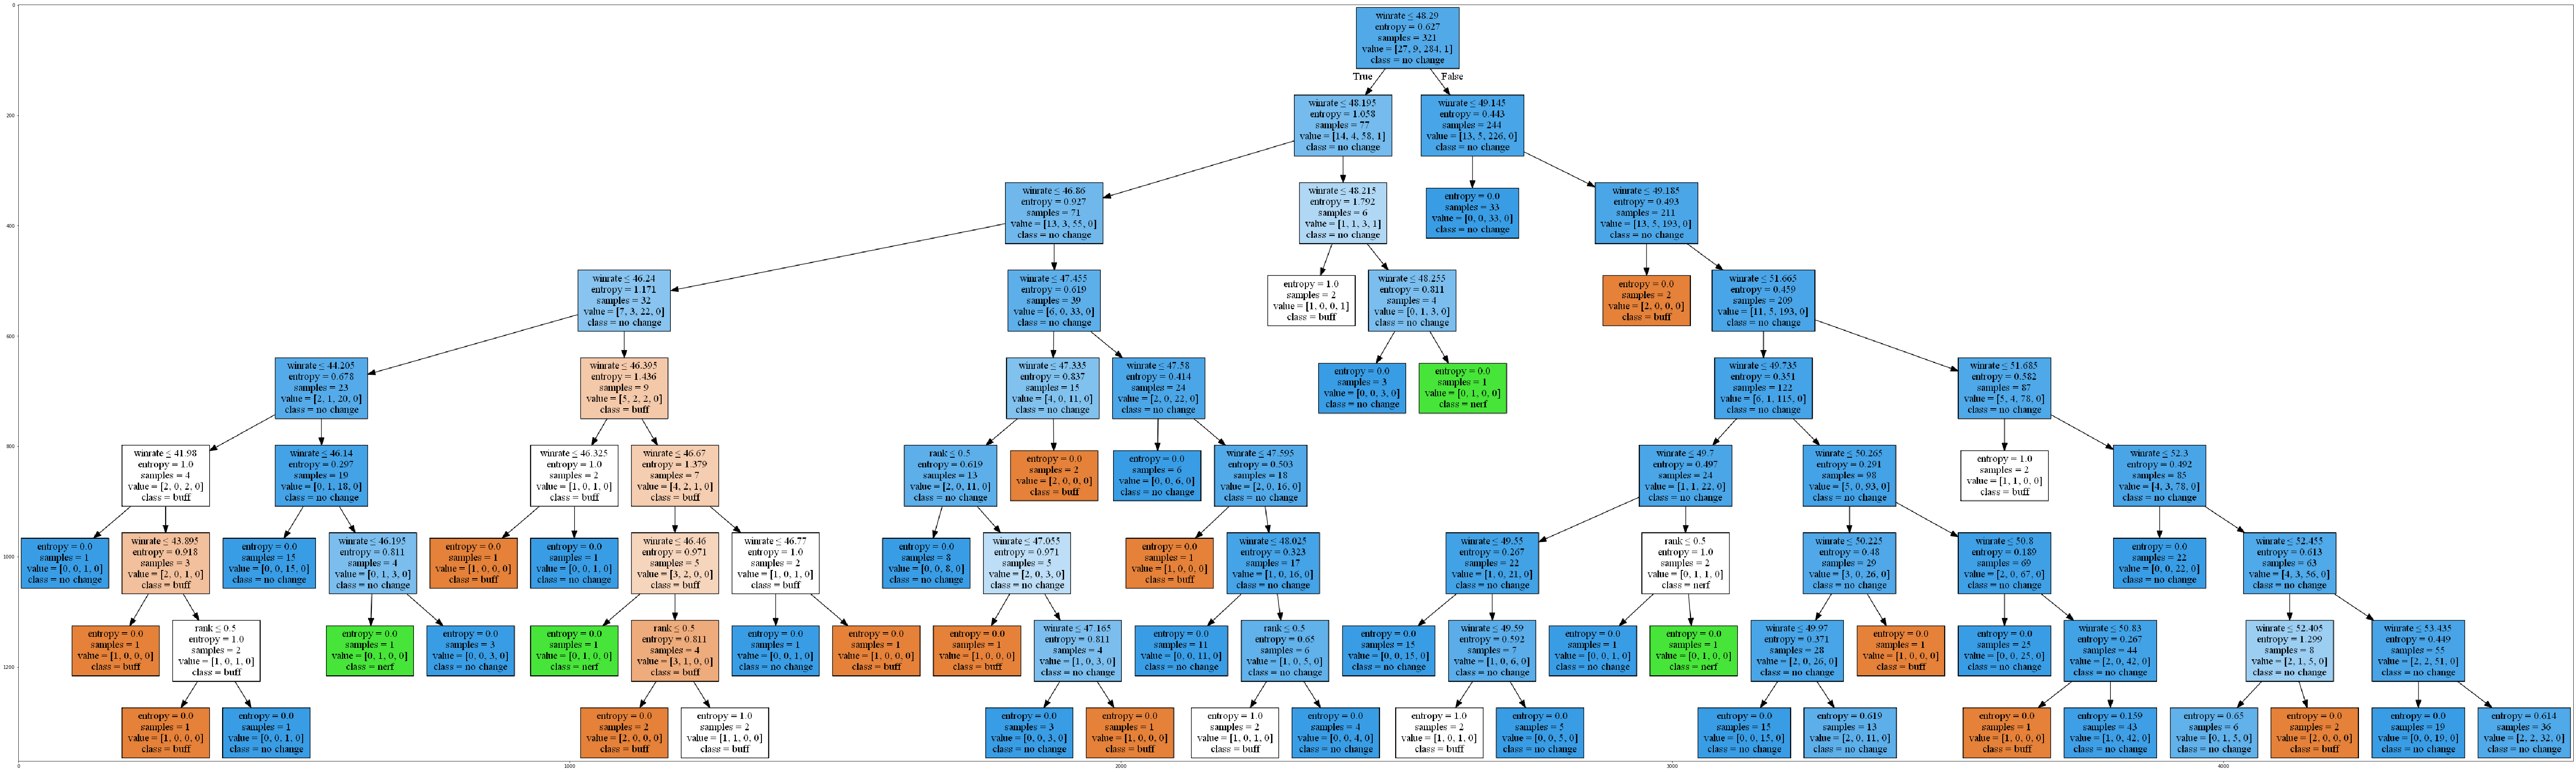

In [237]:
dot_data = StringIO()
filename = "bufftree.png"
featureNames = my_data.columns[2:4]
out=tree.export_graphviz(buffTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')